### Urban Sound Classification Part 1

This notebook details steps taken in the classifcation of urban sounds.  The dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music.

This is a Analytics Vidha Practice problem:
- `datahack.analyticsvidhya.com/contest/practice-problem-urban-sound-classification/`





In [16]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
%matplotlib inline
import IPython
import pandas as pd
import librosa.display 

In [17]:
path = "D:\\ml_code\\keras\\urban_sound\\samples\\"
csv_path = "D:\\ml_code\\keras\\urban_sound\\folder_test\\"

### The Audio Files

The audio files are in wav format.  Most of the files are greater than  500 Kb in size.  To reduce memory and processing requirements the files are converted to mp3 format and downsampled to 8 khz and 64kbps bit rate.  Converting to mp3 will throw away information that the human ear is not sensitive to - but this may affect audio classification.  

But lets try anyway and see what happens anyway!     


In [32]:
#this is a jackhammer 
IPython.display.Audio('104.mp3' )

In [33]:
#this is a street band
IPython.display.Audio('132.mp3' )

In [20]:
#put some of the files in a smaller folder for testing
df = pd.read_csv(csv_path +'folder_test.csv')

In [21]:
print(df.head(10))

   ID             Class
0   0             siren
1   1      street_music
2   2          drilling
3   3             siren
4   4          dog_bark
5   6  children_playing
6  10      street_music
7  11          drilling
8  12          gun_shot
9  15          dog_bark


In [22]:
df['Class'].value_counts()

siren               10
jackhammer          10
street_music         9
children_playing     7
drilling             6
gun_shot             6
dog_bark             6
engine_idling        5
air_conditioner      5
car_horn             4
Name: Class, dtype: int64

In [23]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp,sr=8000)
        raw_sounds.append(X)
    return raw_sounds

### Comparison of wav and mp3

In [24]:
#make a listing of the files in the test folder

files = [path+file for file in os.listdir(path)]
file_id = []
for file in files:
    file_id.append(file.split('\\')[-1])

file_id

['104.mp3', '104.wav', '132.mp3', '132.wav']

In [25]:
#make a list of the audio sample
raw_sounds = load_sound_files(files)

In [26]:
def test_waveplot_mono_figs(raw_sounds,file_id,sr=8000,axis = 'off'):
    plt.figure(figsize=(10,10))
    i = 1
    for n,f in zip(file_id, raw_sounds):
        plt.subplot(4, 1, i)
        if i == 4:axis = 'time'
        librosa.display.waveplot(np.array(f), sr=sr, x_axis=axis)
        plt.title(n)
        i +=1
    plt.suptitle('Figure 1: Waveplot',x=0.25, y=0.915,fontsize=16)
    plt.show()

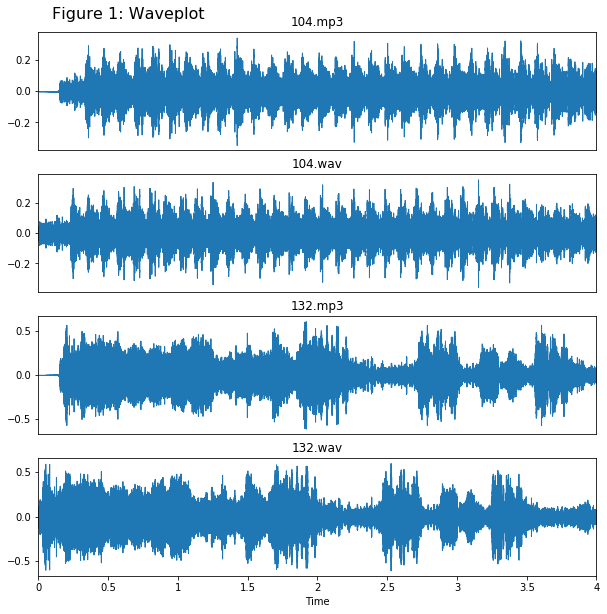

In [27]:
test_waveplot_mono_figs(raw_sounds,file_id)

In the time domain we can clearly see the difference in the audio between the jackhammer and street band.  104 the jackhammer, has a very repeatable sound, the mp3 time domain waveform looks very similar to wav but would expect to see such differences in the time domain, there is an obvious latency which may come from the mp3 algorithm using prediction to reduce the bit rate.  File 132 - the street band displays much more variation than the jackhammer.  

Lets look at a spectrogram

In [28]:
def test_specgram_mono(raw_sounds,file_id,sr=8000):
    plt.figure(figsize=(12,14))
    i = 1
    for n,f in zip(file_id,raw_sounds):
        plt.subplot(4, 1, i)
        specgram(np.array(f), Fs=sr)
        plt.title(n)
        i +=1
    plt.suptitle('Figure 2: Spectogram',x=0.25, y=0.9,fontsize=16)
    plt.show()

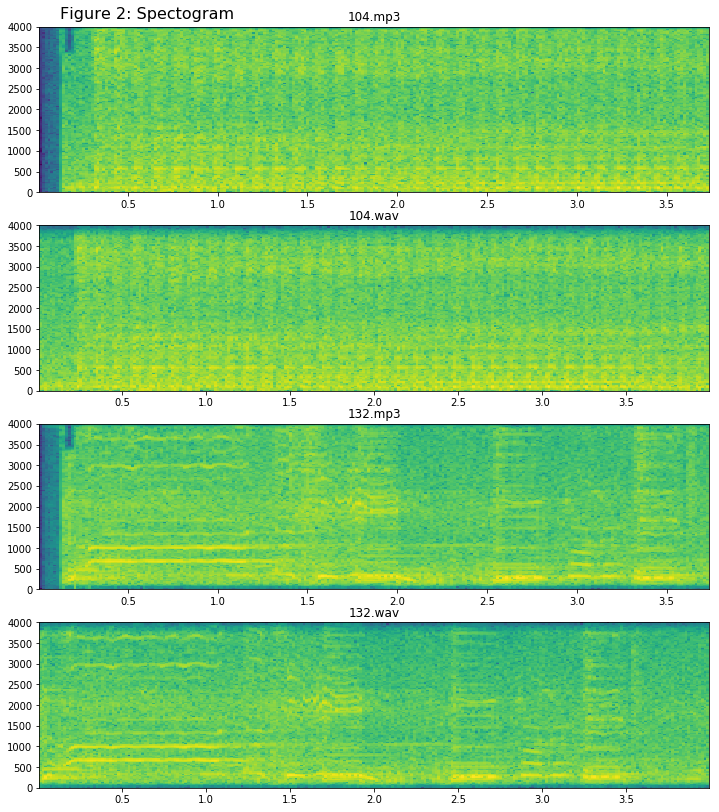

In [29]:
test_specgram_mono(raw_sounds,file_id)

Cannot see major differences between the wav and mp3 format in both cases 

Lets try the db based specgram

In [30]:
def test_specgram_log_mono(raw_sounds,file_id,sr=8000, axis = 'off'):
    plt.figure(figsize=(12,16))
    i = 1
    for n,f in zip(file_id,raw_sounds):
        plt.subplot(4, 1, i)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(f))**2, ref=np.max)
        if i == 4: axis = 'time'
        librosa.display.specshow(D,x_axis=axis ,y_axis='log')
        plt.title(n)
        i +=1
    plt.suptitle('Figure 3: db scaled Spectogram',x=0.25, y=0.9,fontsize=16)
    plt.show()

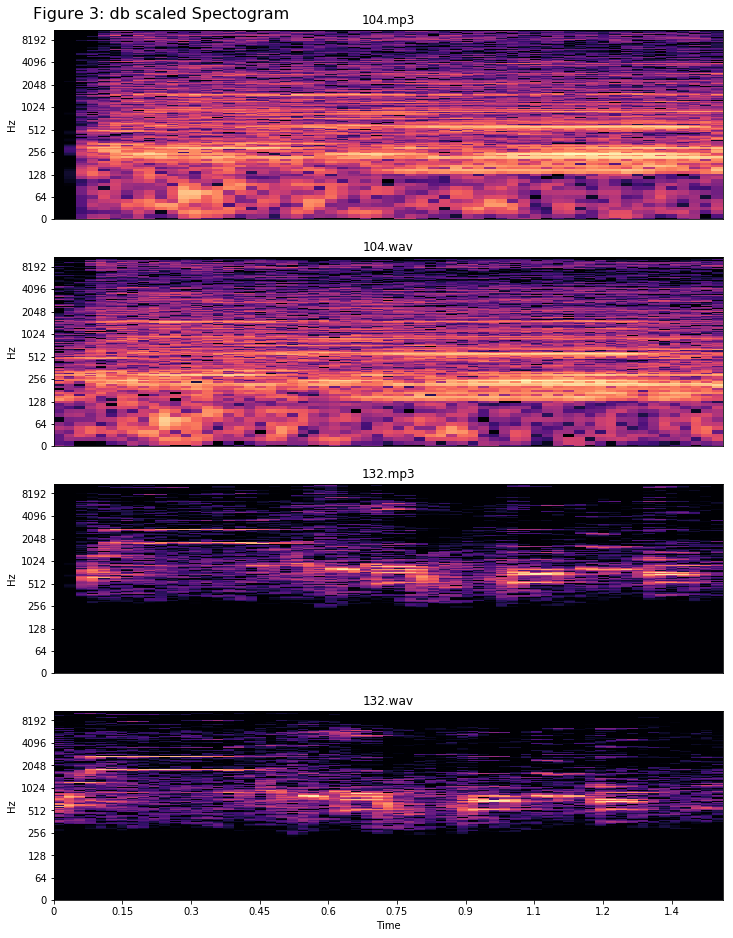

In [31]:
test_specgram_log_mono(raw_sounds,file_id)

Again cannot any major discrepancies.

This simple notebook has processed the audio sounds from the Urban Sounds Challenge.  Some simple tests have been carried out to look at the issues at converting from wav to a lower quality mp3 format.  

In the next notebook we wil try classification of the audio samples in mp3 format - just to see what happens!